# Переобучение

Вгрузим и подготовим данные

In [1]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10


data = pd.read_csv('C:\\StudentsPerformance.csv', sep=',')
data = data.drop(['reading score'], axis='columns')
def ch(gender):
    if gender == 'male':
        return 1
    return 0

data['gender'] = data['gender'].apply(ch)
def cha(race):
    if race == 'group A':
        return 0
    if race == 'group B':
        return 1
    if race == 'group C':
        return 2
    if race == 'group D':
        return 3
    return 4

data['race/ethnicity'] = data['race/ethnicity'].apply(cha)
def chan(edu):
    if edu == 'some college':
        return 0
    if edu == "associate's degree":
        return 1
    if edu == 'high school':
        return 2
    if edu == 'some high school':
        return 3
    if edu == "bachelor's degree":
        return 4
    return 5

data['parental level of education'] = data['parental level of education'].apply(chan)
def chang(lunch):
    if lunch == 'standard':
        return 1
    return 0

data['lunch'] = data['lunch'].apply(chang)
def change(test):
    if test == 'completed':
        return 1
    return 0

data['test preparation course'] = data['test preparation course'].apply(change)
data.head()

gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            4      1   
1       0               2                            0      1   
2       0               1                            5      1   
3       1               0                            1      0   
4       1               2                            0      1   

   test preparation course  math score  writing score  
0                        0          72             74  
1                        1          69             88  
2                        0          90             93  
3                        0          47             44  
4                        0          76             75

Так как у кого-то есть уникальный балл за тест, необходимо удвоить выборку.
Поделим выборку 

In [2]:
data = pd.concat([data, data])

X = data.drop(['math score'], axis='columns')

y = data['math score']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)



Обучим логистическую регрессию и посмотрим результат. Для этого напишем функции: для отрисовки результата, для логистической регрессии без регуляризции, с L1, L2 регуляризции.

In [3]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
# функция отрисовки результатов
def showResult(y_Test, test_predict, linear_model):
    rcParams['figure.figsize'] = 20,12
    x = np.arange(len(test_predict))
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(x, test_predict, label='model result')
    ax.plot(x, y_Test, label='true result')
    plt.title(linear_model)
    ax.legend()
    plt.show()
    
    # без регуляризции    
def linear_reg_Simple(y_dataTrain, dataTrain, y_dataTest, dataTest):    
    reg = LinearRegression(normalize=False) # нормализация уже была в шагах ЛР 2
    reg.fit(dataTrain, y_dataTrain)
    test_score = reg.score(dataTest, y_dataTest)
    y_pred = reg.predict(dataTest)
    print('Score linear_reg_Simple:', test_score);
    print('Weight vector:', reg.coef_)
    showResult(y_dataTest, y_pred, 'linear_reg Simple')
    
# L1    
def linear_reg_Lasso(y_dataTrain, dataTrain, y_dataTest, dataTest, alpha_coef):
    reg = Lasso(alpha=alpha_coef)
    reg.fit(dataTrain, y_dataTrain)    
    test_score = reg.score(dataTest, y_dataTest)    
    print('Score L1 Lasso:', test_score); 
    print('Weight vector:', reg.coef_)
    test_predict = reg.predict(dataTest)     
    showResult(y_dataTest, test_predict, 'linear_reg L1 Lasso')
    
    
# L2    
def linear_reg_Ridge(y_dataTrain, dataTrain, y_dataTest, dataTest, alpha_coef):
    reg = Ridge(alpha=alpha_coef)
    reg.fit(dataTrain, y_dataTrain)    
    test_score = reg.score(dataTest, y_dataTest)    
    print('Score L2 Ridge:', test_score);
    print('Weight vector:', reg.coef_)
    test_predict = reg.predict(dataTest)     
    showResult(y_dataTest, test_predict, 'linear_reg L2 Ridge')

Score linear_reg_Simple: 0.8624093258266133
Weight vector: [13.59966716  0.81288534 -0.30299509  3.38776911 -3.70613358  0.93969668]


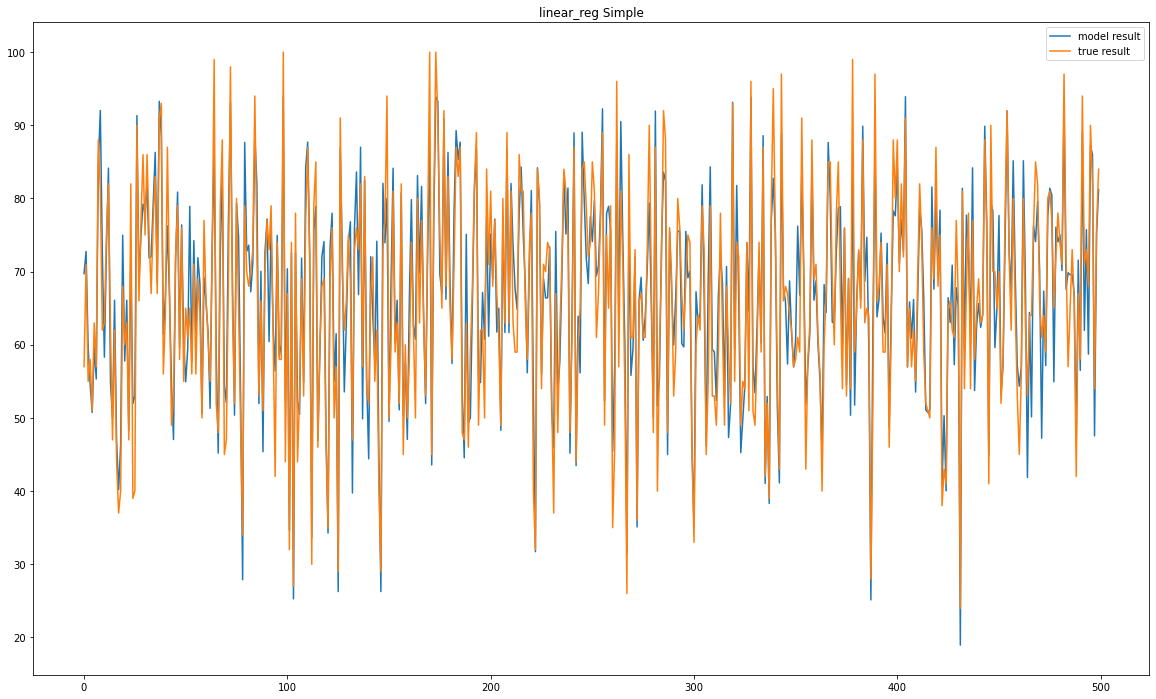

In [4]:
# логистическая регрессия без регуляризции
linear_reg_Simple(y_train, X_train, y_test, X_test)

# Логистическая регрессия L1

C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23451.001132544494, tolerance: 34.8914544
  model = cd_fast.enet_coordinate_descent(


Score L1 Lasso: 0.8624093258266134
Weight vector: [13.59966716  0.81288534 -0.30299509  3.38776911 -3.70613358  0.93969668]


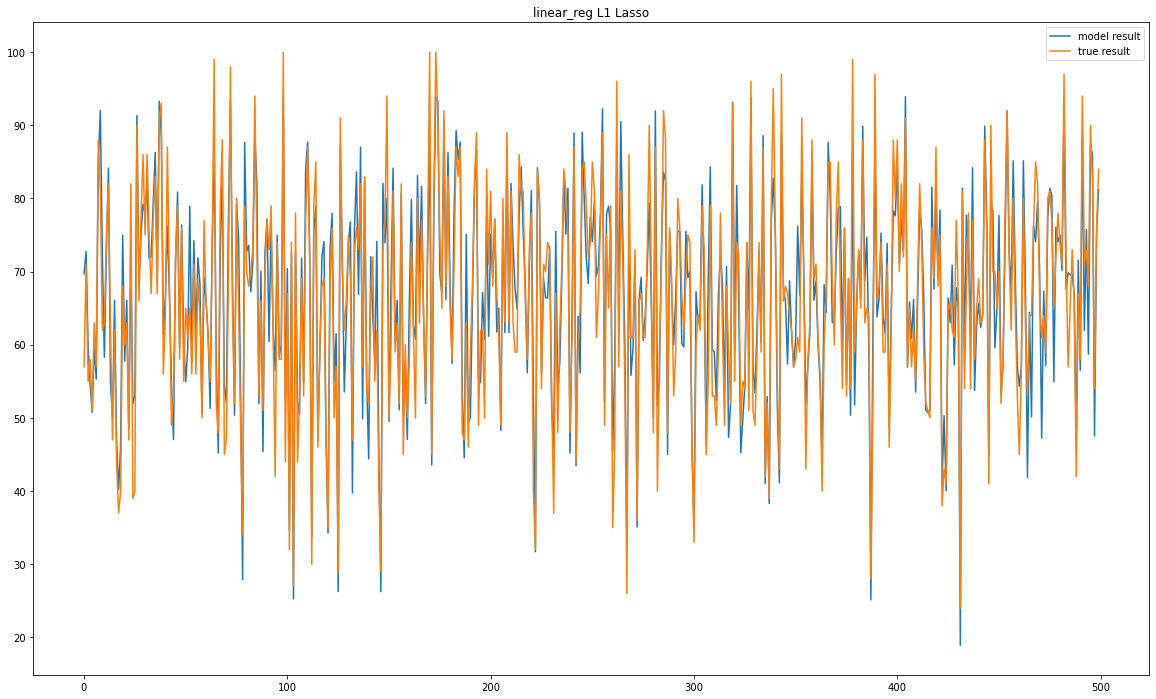

Score L1 Lasso: 0.8624093258268892
Weight vector: [13.59966716  0.81288534 -0.30299509  3.38776911 -3.70613358  0.93969668]


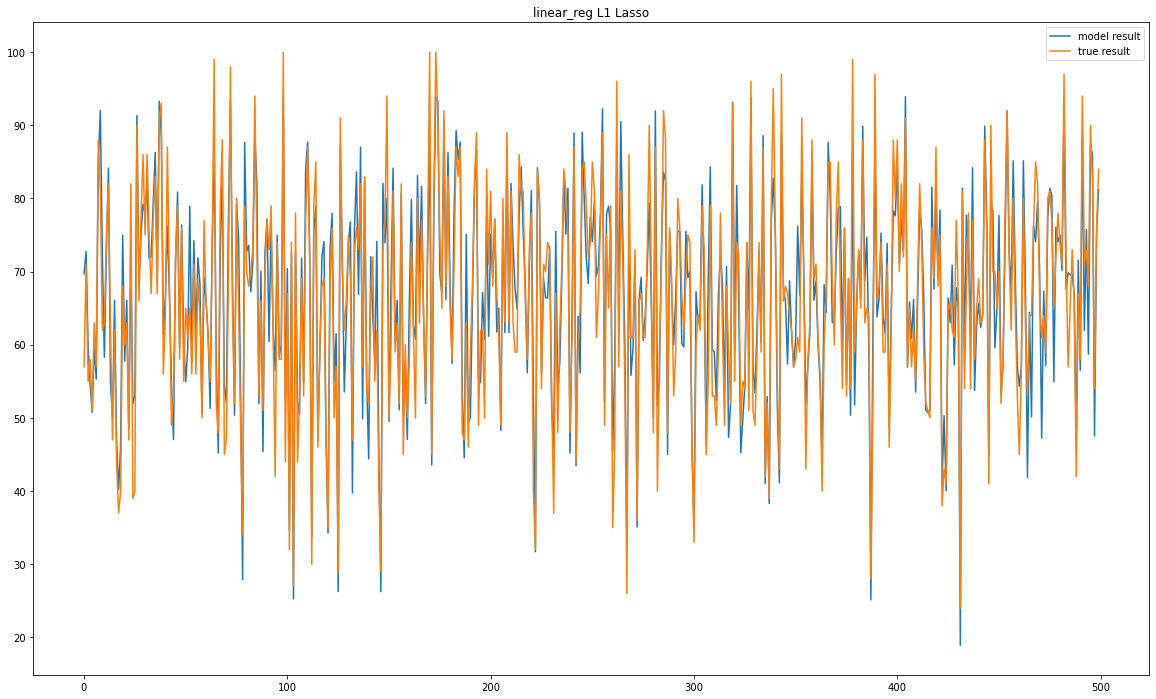

Score L1 Lasso: 0.8624093258537779
Weight vector: [13.59966712  0.81288533 -0.30299508  3.38776908 -3.70613353  0.93969668]


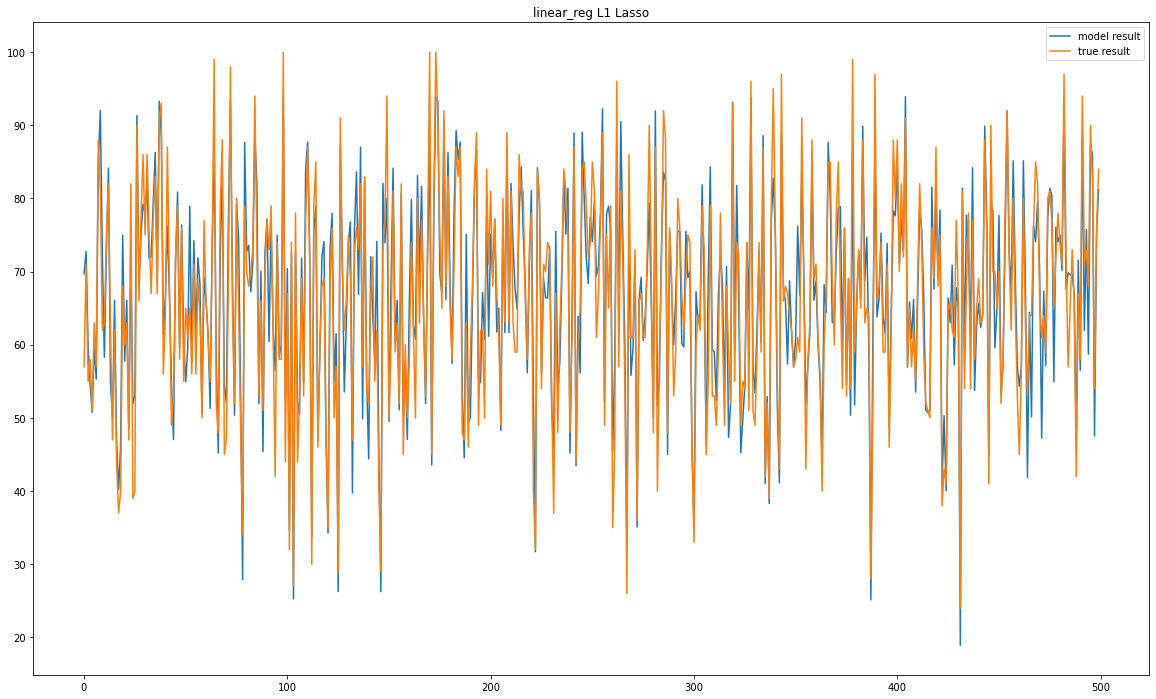

Score L1 Lasso: 0.8624096000790571
Weight vector: [13.59920963  0.81282854 -0.30295893  3.38743167 -3.70563158  0.9396899 ]


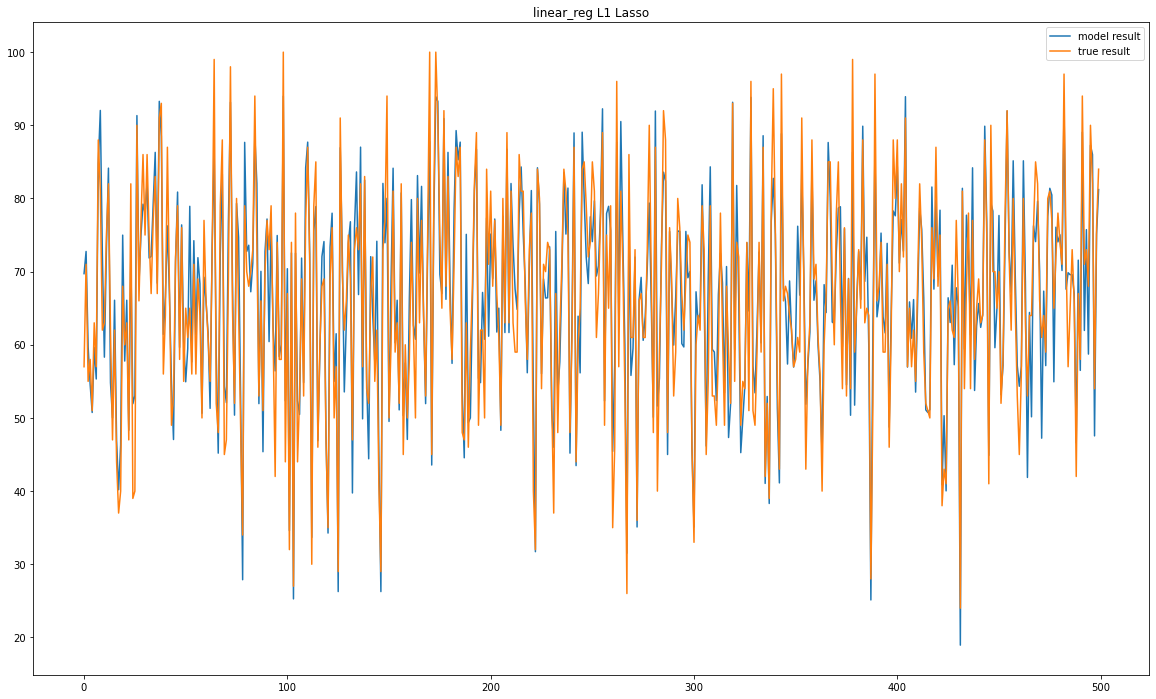

Score L1 Lasso: 0.8624119919976707
Weight vector: [13.59507049  0.81232012 -0.30263271  3.3844127  -3.70109301  0.93962832]


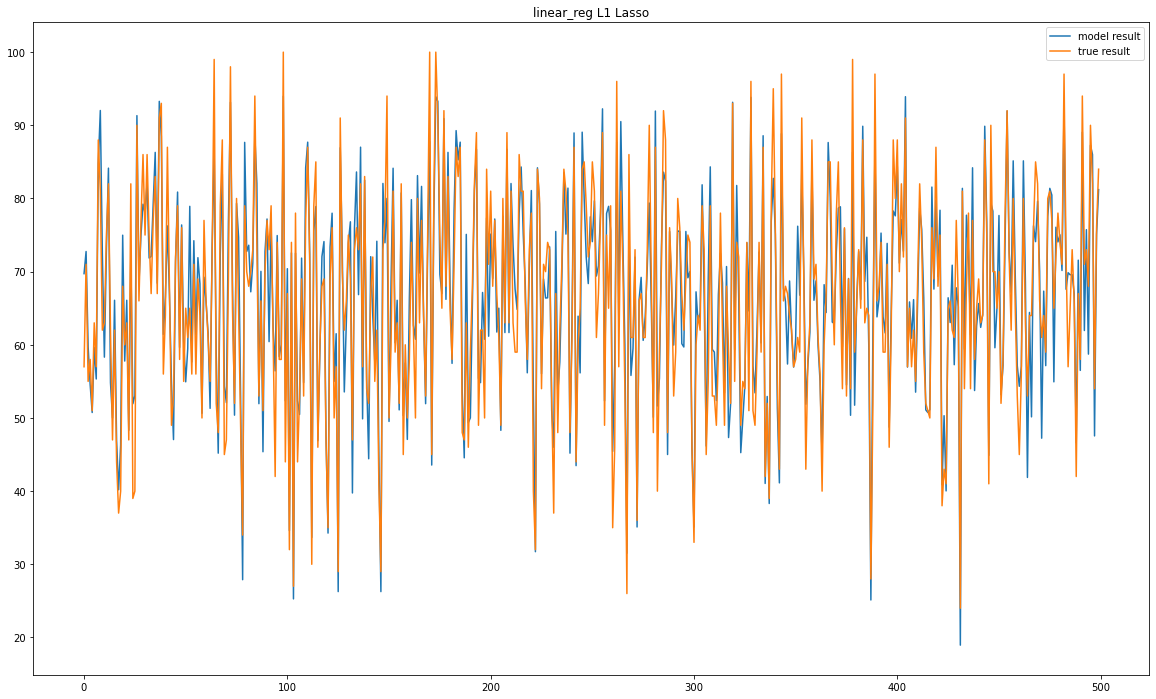

Score L1 Lasso: 0.8624312592117453
Weight vector: [13.55436009  0.80714978 -0.29939568  3.35364858 -3.65636515  0.93903085]


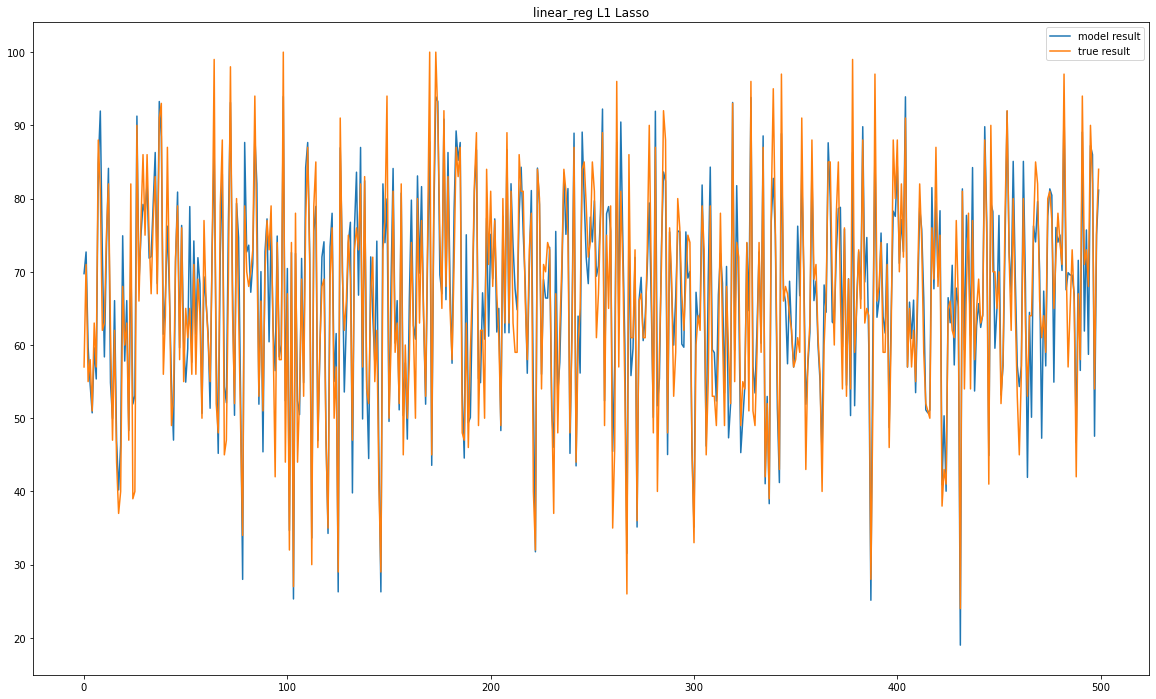

Score L1 Lasso: 0.8171708193481088
Weight vector: [ 9.23456784  0.21568941 -0.          0.         -0.          0.88754663]


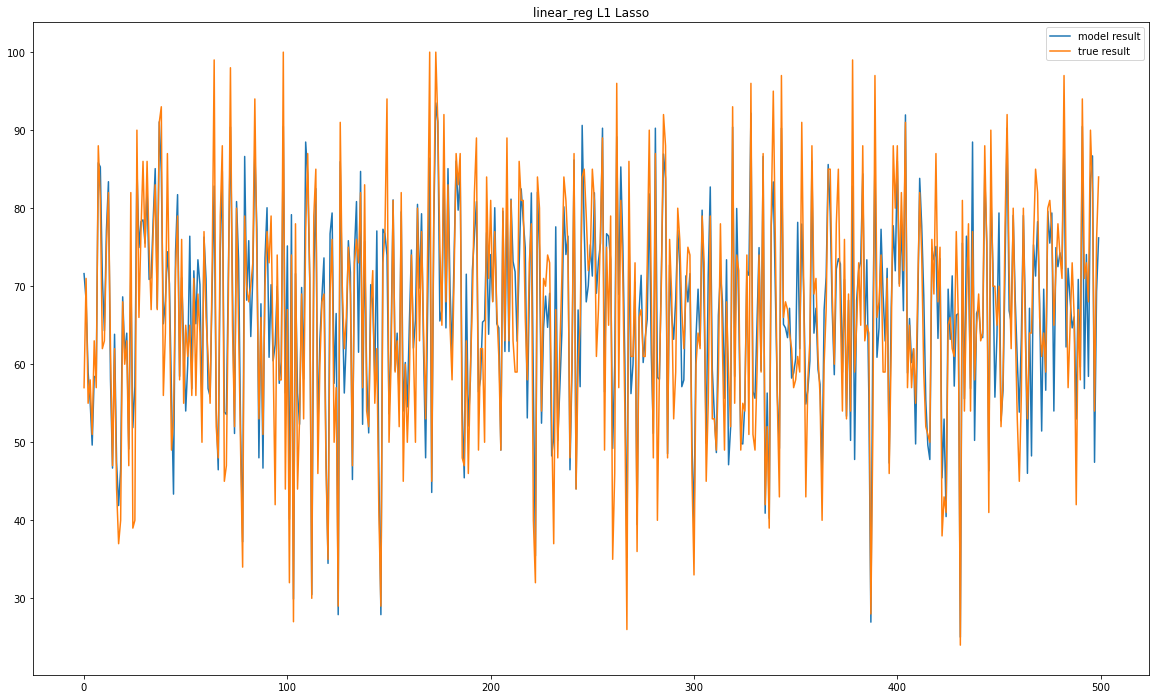

Score L1 Lasso: 0.6479260427640723
Weight vector: [ 0.          0.         -0.          0.         -0.          0.78428611]


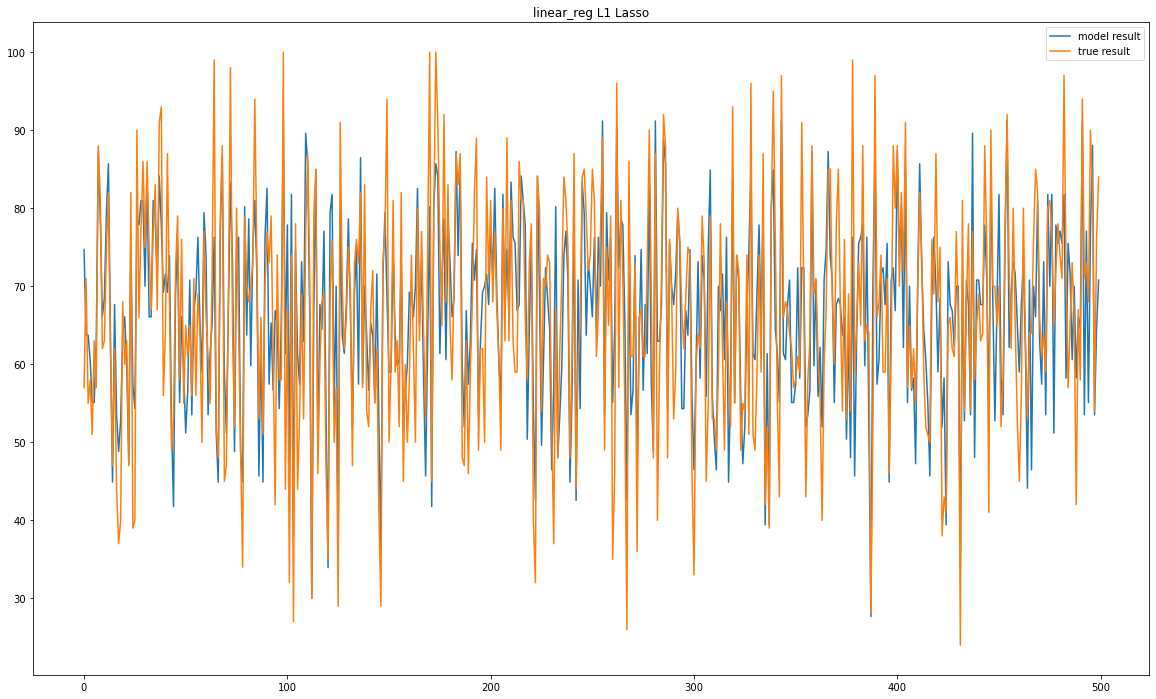

Score L1 Lasso: 0.6473650064324057
Weight vector: [ 0.         0.        -0.         0.        -0.         0.7625742]


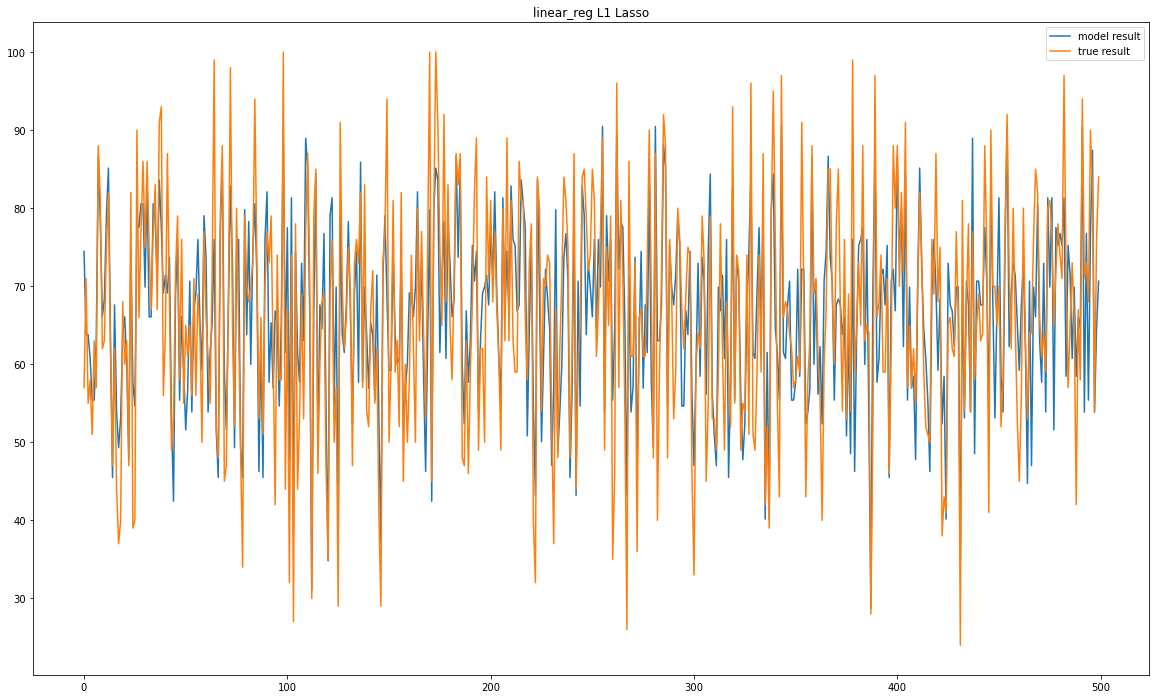

Score L1 Lasso: -0.00012175256185598116
Weight vector: [0. 0. 0. 0. 0. 0.]


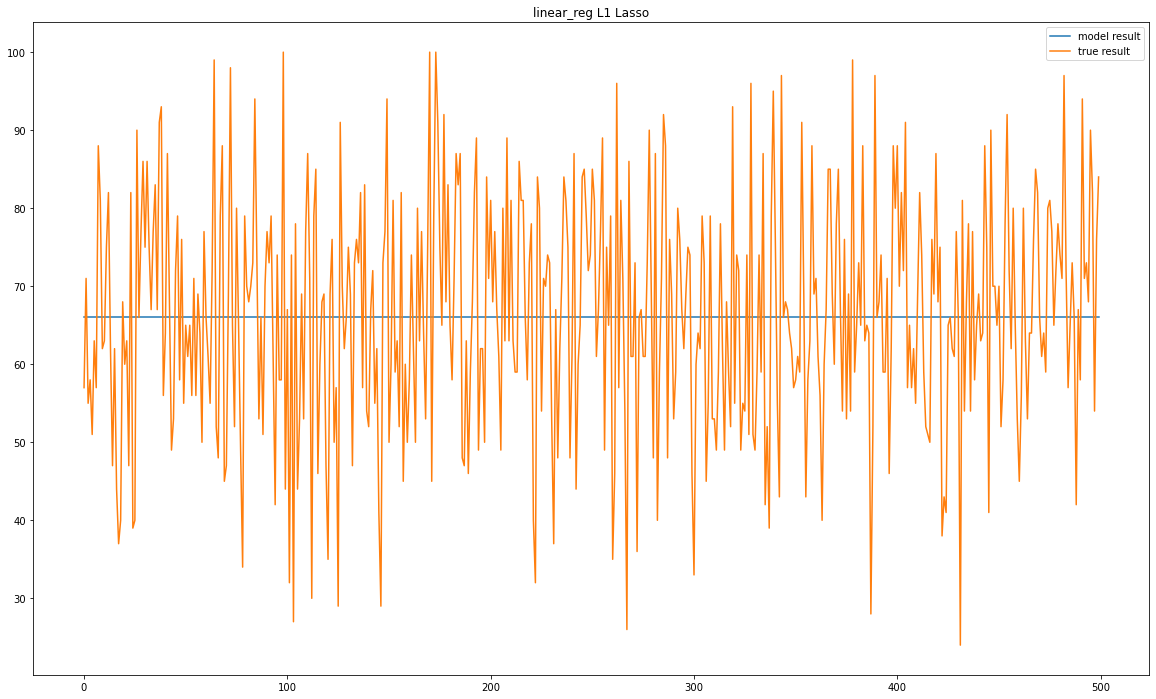

In [5]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 200]
for i in range(0,10):
    linear_reg_Lasso(y_train, X_train, y_test, X_test, alpha_lasso[i])

Оказывается, переобучение при использовании линейных моделей можно увидеть не только на графике! Обратите внимание: коэффициенты при больших степенях полинома огромные!

# Логистическая регрессия L2

Score L2 Ridge: 0.8624093258266133
Weight vector: [13.59966716  0.81288534 -0.30299509  3.38776911 -3.70613358  0.93969668]


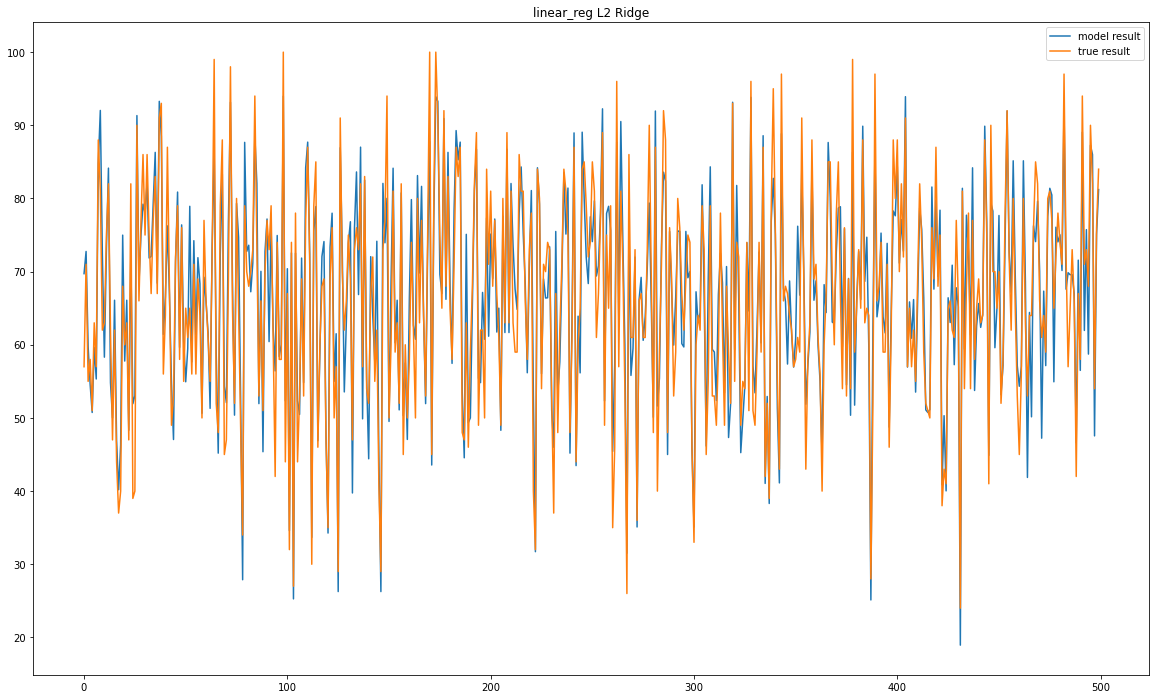

Score L2 Ridge: 0.8624093258266128
Weight vector: [13.59966716  0.81288534 -0.30299509  3.38776911 -3.70613358  0.93969668]


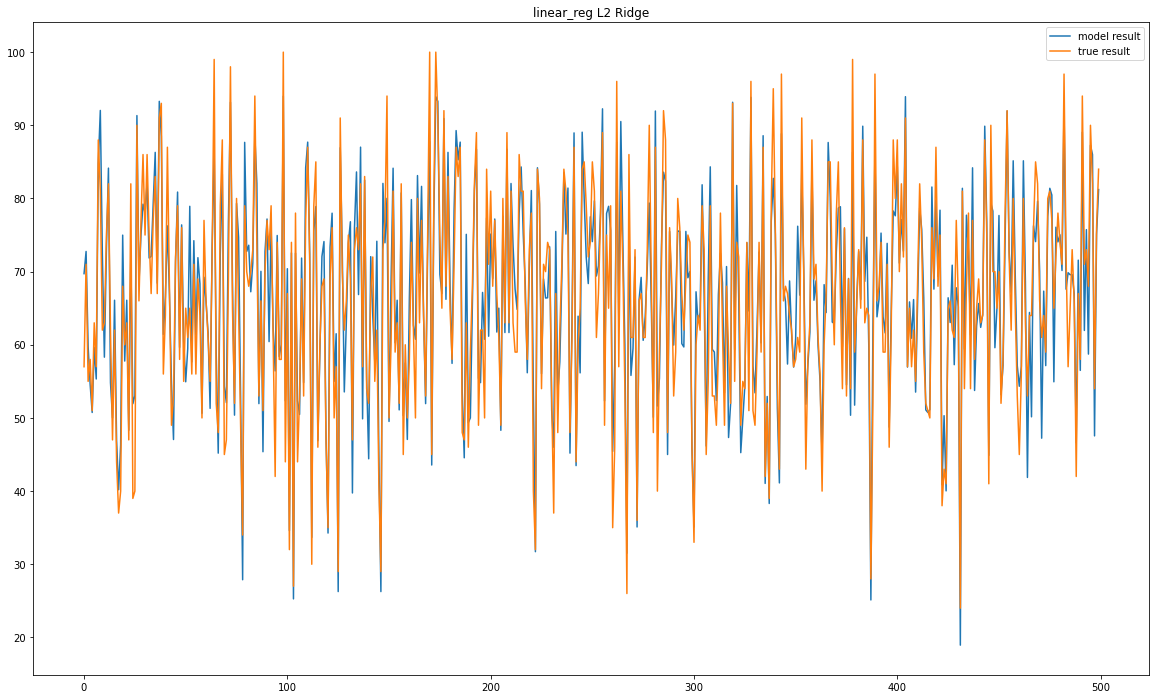

Score L2 Ridge: 0.8624093258265602
Weight vector: [13.59966716  0.81288534 -0.30299509  3.38776911 -3.70613358  0.93969668]


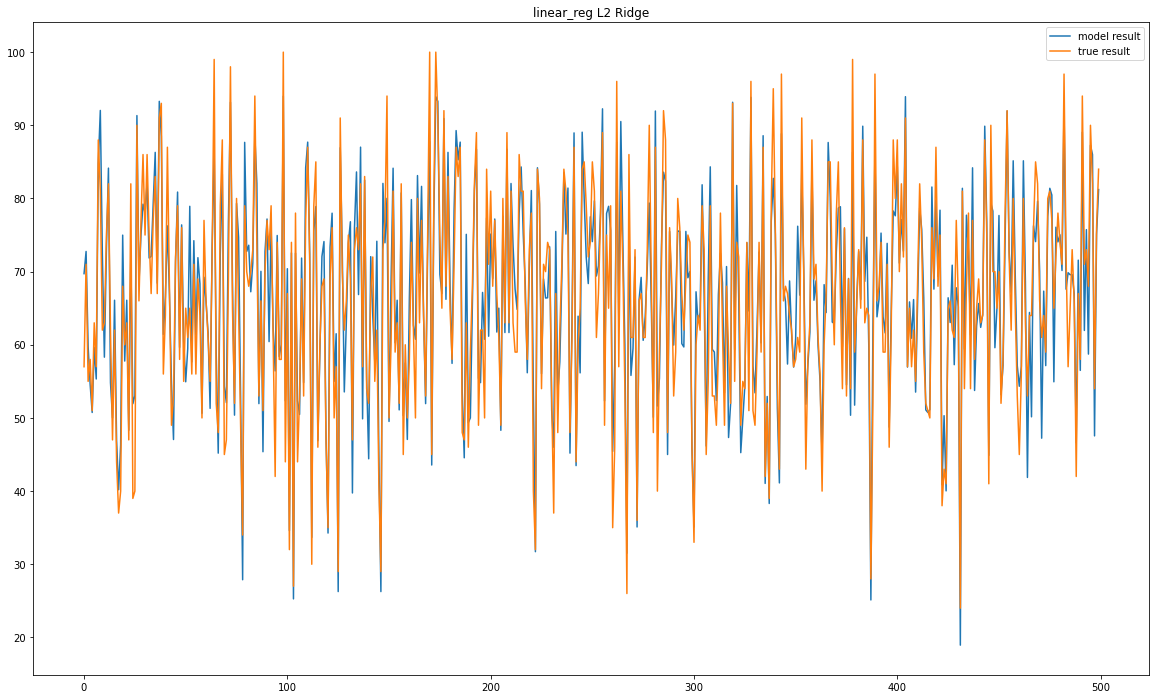

Score L2 Ridge: 0.8624093252954163
Weight vector: [13.59966304  0.8128854  -0.30299509  3.38776874 -3.70613193  0.93969662]


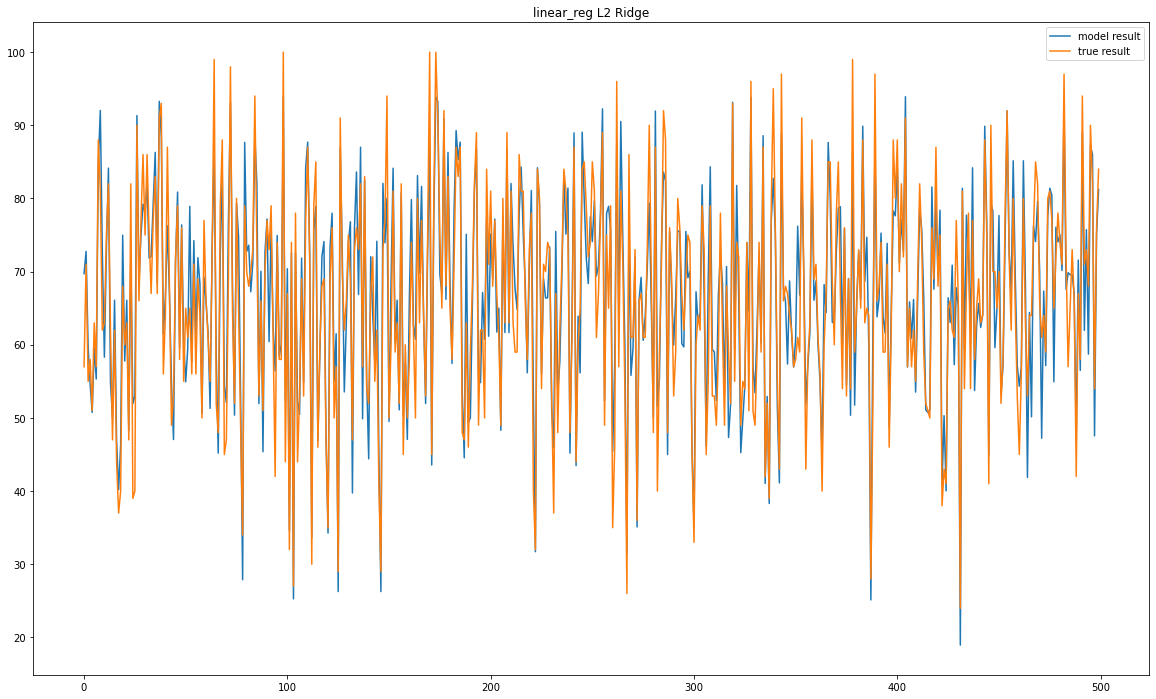

Score L2 Ridge: 0.8624093205129955
Weight vector: [13.59962598  0.81288602 -0.30299514  3.38776539 -3.70611712  0.93969614]


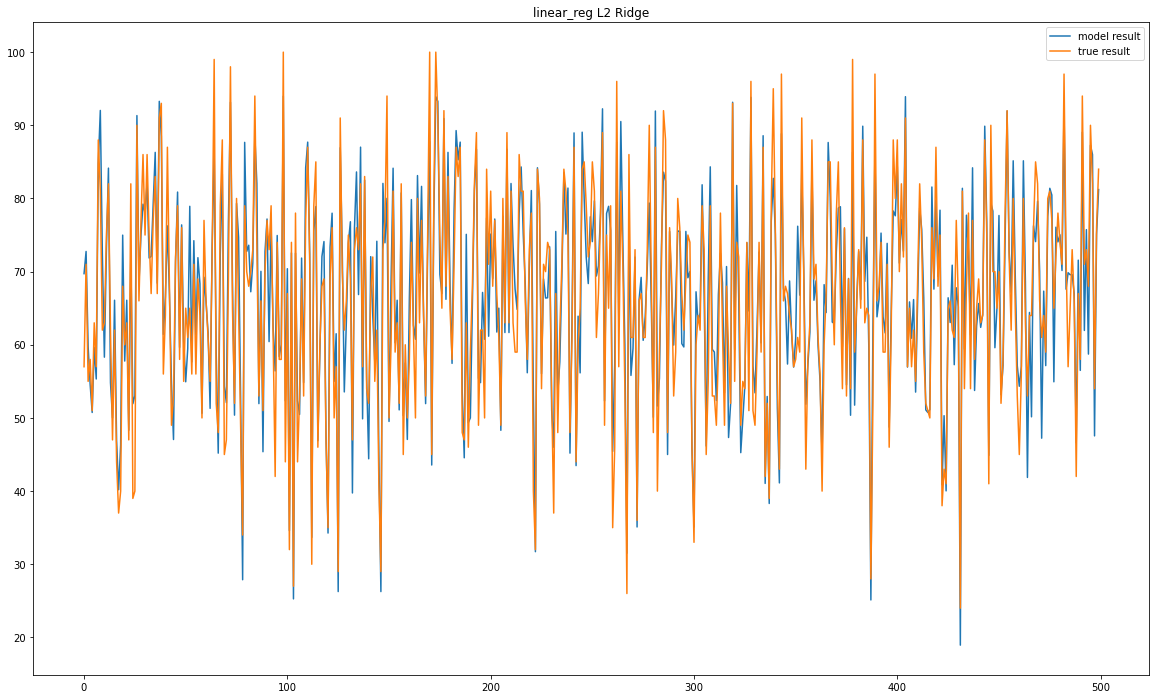

Score L2 Ridge: 0.8624092725257573
Weight vector: [13.59925535  0.8128922  -0.30299559  3.38773188 -3.70596904  0.93969129]


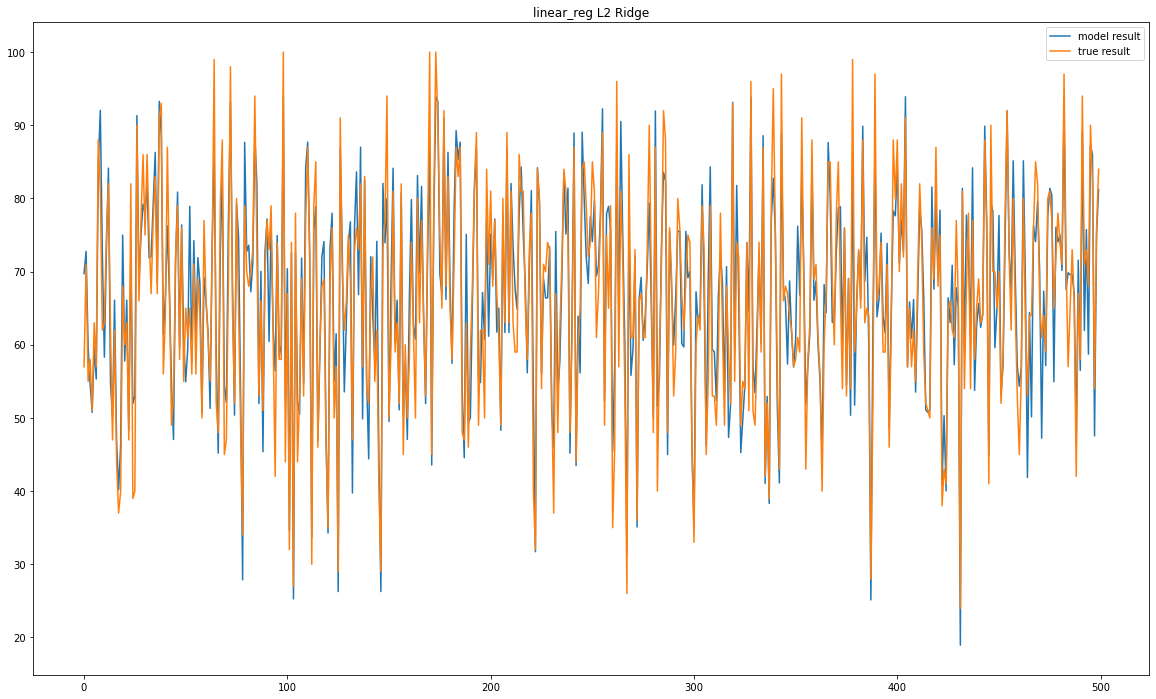

Score L2 Ridge: 0.8624021957525512
Weight vector: [13.55861395  0.81356801 -0.30304559  3.38403466 -3.68974871  0.93915982]


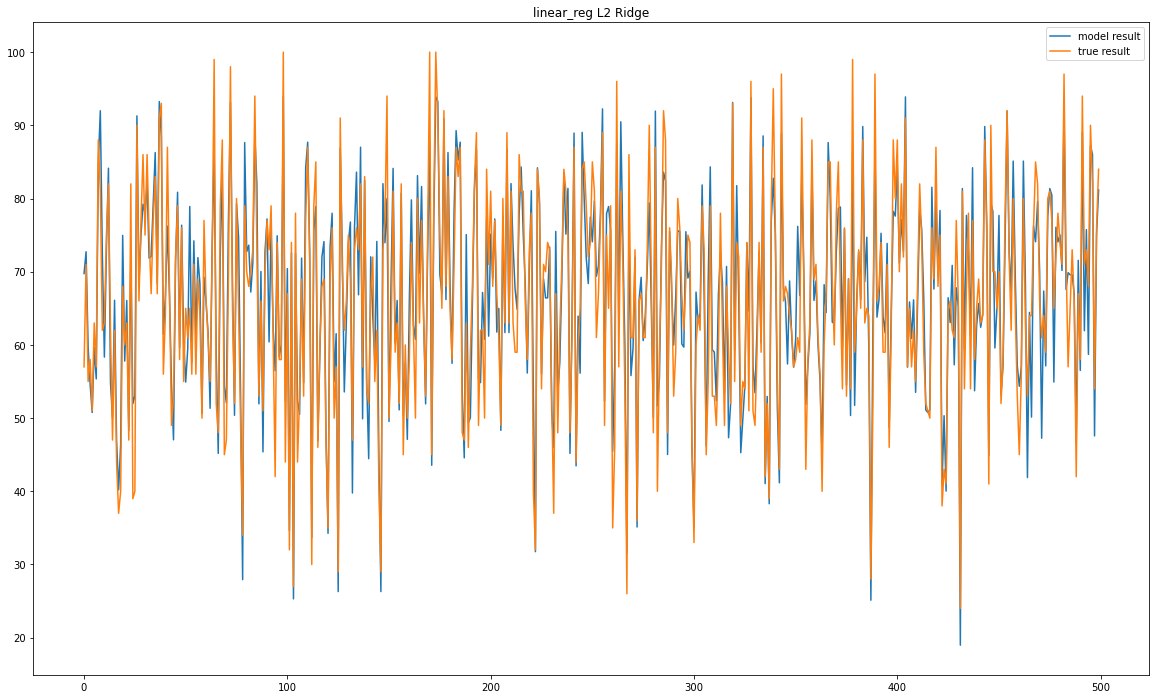

Score L2 Ridge: 0.8623384399517815
Weight vector: [13.39694287  0.81622102 -0.30324278  3.36888169 -3.62557331  0.93705255]


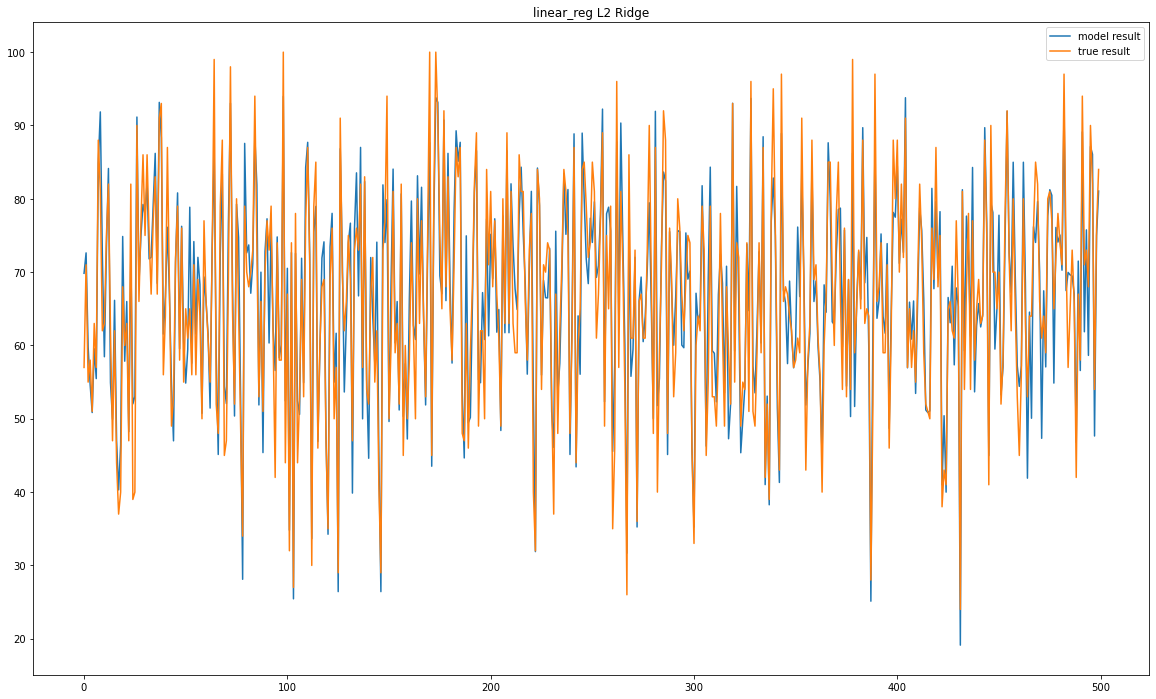

Score L2 Ridge: 0.8621843099302233
Weight vector: [13.20039195  0.81936864 -0.30347844  3.34950426 -3.54830096  0.93450552]


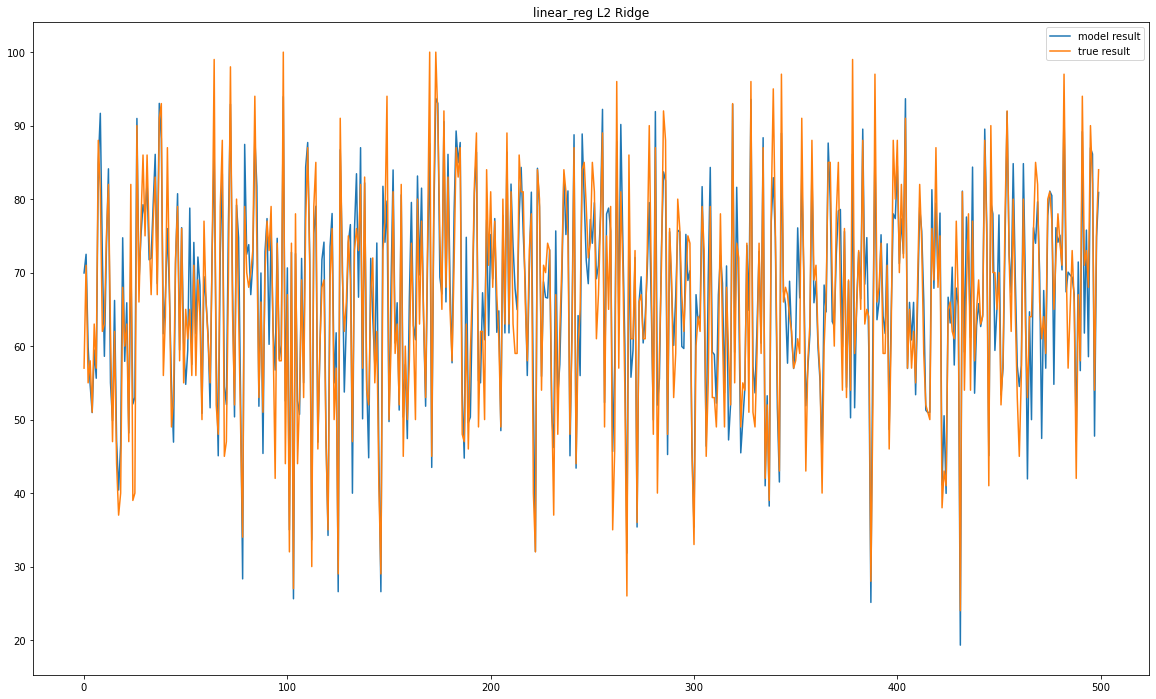

Score L2 Ridge: 0.8335706204834343
Weight vector: [ 8.51462496  0.85929186 -0.30562612  2.59359061 -1.9386098   0.87843863]


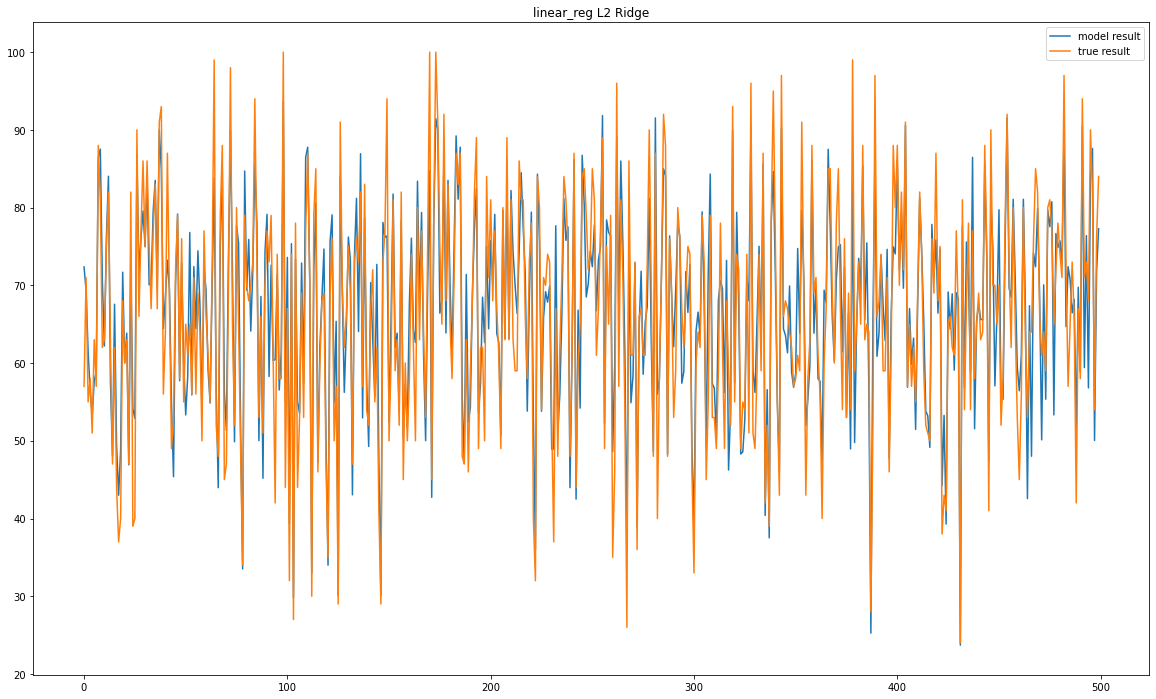

In [6]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 200]
for i in range(0,10):
    linear_reg_Ridge(y_train, X_train, y_test, X_test, alpha_ridge[i])

L1 и L2 показывают приблизительно одинаковые результаты, однако, после С=0.01 алгоритм L1 начинает показывать плохие результаты скоринга.